In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [4]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Normalize the images (convert pixel values from [0,255] → [0,1])
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape to (samples, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (60000, 28, 28, 1)
Test set shape: (10000, 28, 28, 1)


In [5]:
model = models.Sequential([
    # C1: Convolution layer
    layers.Conv2D(6, kernel_size=(5,5), activation='tanh', input_shape=(28,28,1), padding='same'),
    # S2: Average Pooling
    layers.AveragePooling2D(pool_size=(2,2), strides=2),

    # C3: Convolution layer
    layers.Conv2D(16, kernel_size=(5,5), activation='tanh'),
    # S4: Average Pooling
    layers.AveragePooling2D(pool_size=(2,2), strides=2),

    # Flatten the feature maps
    layers.Flatten(),

    # C5: Fully connected layer
    layers.Dense(120, activation='tanh'),
    # F6: Fully connected layer
    layers.Dense(84, activation='tanh'),

    # Output layer: 10 neurons (digits 0–9)
    layers.Dense(10, activation='softmax')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)


Epoch 1/10
422/422 - 32s - 75ms/step - accuracy: 0.8934 - loss: 0.3640 - val_accuracy: 0.9572 - val_loss: 0.1453
Epoch 2/10
422/422 - 30s - 72ms/step - accuracy: 0.9574 - loss: 0.1393 - val_accuracy: 0.9733 - val_loss: 0.0946
Epoch 3/10
422/422 - 39s - 93ms/step - accuracy: 0.9717 - loss: 0.0937 - val_accuracy: 0.9770 - val_loss: 0.0752
Epoch 4/10
422/422 - 28s - 67ms/step - accuracy: 0.9784 - loss: 0.0703 - val_accuracy: 0.9800 - val_loss: 0.0718
Epoch 5/10
422/422 - 41s - 97ms/step - accuracy: 0.9823 - loss: 0.0558 - val_accuracy: 0.9817 - val_loss: 0.0693
Epoch 6/10
422/422 - 43s - 101ms/step - accuracy: 0.9855 - loss: 0.0449 - val_accuracy: 0.9820 - val_loss: 0.0640
Epoch 7/10
422/422 - 28s - 67ms/step - accuracy: 0.9881 - loss: 0.0378 - val_accuracy: 0.9850 - val_loss: 0.0522
Epoch 8/10
422/422 - 29s - 68ms/step - accuracy: 0.9903 - loss: 0.0307 - val_accuracy: 0.9807 - val_loss: 0.0636
Epoch 9/10
422/422 - 43s - 101ms/step - accuracy: 0.9915 - loss: 0.0264 - val_accuracy: 0.9832 

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)


313/313 - 3s - 8ms/step - accuracy: 0.9818 - loss: 0.0567

Test accuracy: 0.9818000197410583


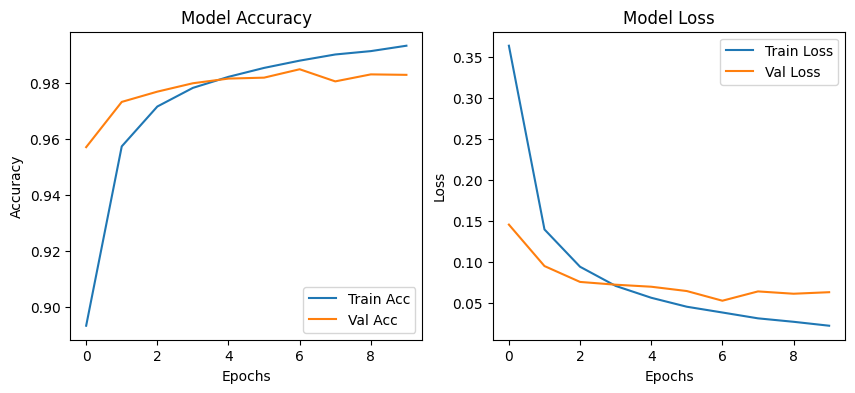

In [9]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [10]:
import numpy as np

predictions = model.predict(x_test[:5])
print("Predicted labels:", np.argmax(predictions, axis=1))
print("True labels:", y_test[:5])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Predicted labels: [7 2 1 0 4]
True labels: [7 2 1 0 4]
